<a href="https://colab.research.google.com/github/bkrant/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Boris_Krant_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [19]:
breast = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',names=['age','year_operation','nodes','survived'])
print(breast.shape)
print(breast.isna().sum())

(306, 4)
age               0
year_operation    0
nodes             0
survived          0
dtype: int64


In [17]:
labels = {'survived': {2:0}}
breast.replace(labels, inplace=True)
breast.survived.value_counts()

1    225
0     81
Name: survived, dtype: int64

In [20]:
print(breast.head())

   age  year_operation  nodes  survived
0   30              64      1         1
1   30              62      3         1
2   30              65      0         1
3   31              59      2         1
4   31              65      4         1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [23]:
print(breast.corr())
print(breast.describe())

                     age  year_operation     nodes  survived
age             1.000000        0.089529 -0.063176  0.067950
year_operation  0.089529        1.000000 -0.003764 -0.004768
nodes          -0.063176       -0.003764  1.000000  0.286768
survived        0.067950       -0.004768  0.286768  1.000000
              age  year_operation       nodes    survived
count  306.000000      306.000000  306.000000  306.000000
mean    52.457516       62.852941    4.026144    1.264706
std     10.803452        3.249405    7.189654    0.441899
min     30.000000       58.000000    0.000000    1.000000
25%     44.000000       60.000000    0.000000    1.000000
50%     52.000000       63.000000    1.000000    1.000000
75%     60.750000       65.750000    4.000000    2.000000
max     83.000000       69.000000   52.000000    2.000000


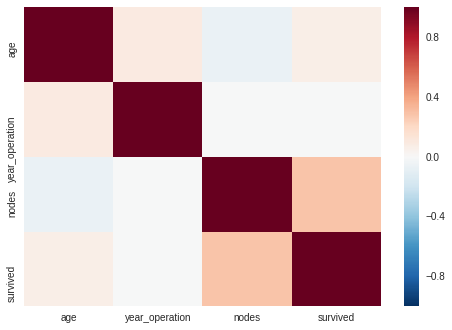

In [37]:
sns.heatmap(breast.corr());

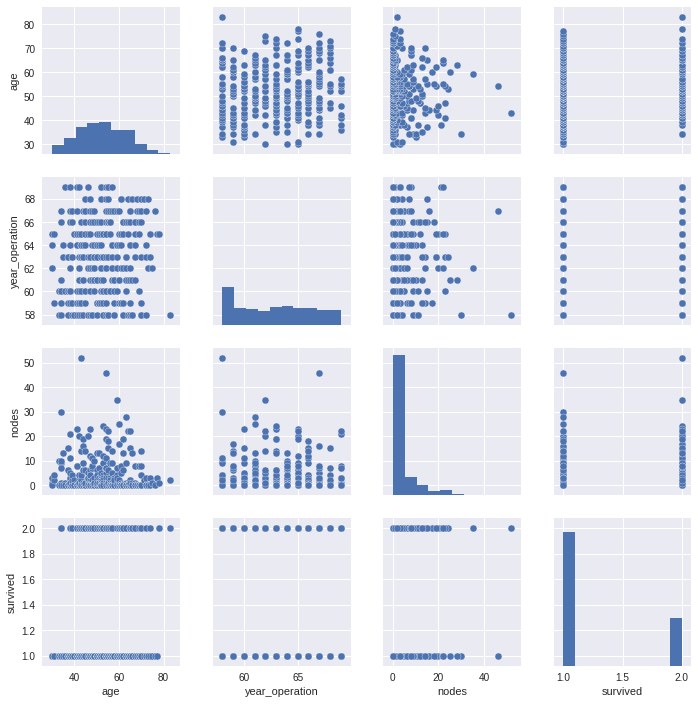

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.pairplot(breast);

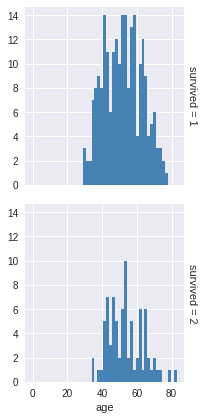

In [30]:
g = sns.FacetGrid(breast, row="survived", margin_titles=True)
bins = np.linspace(0, breast.age.max())
g.map(plt.hist, "age", color="steelblue", bins=bins);

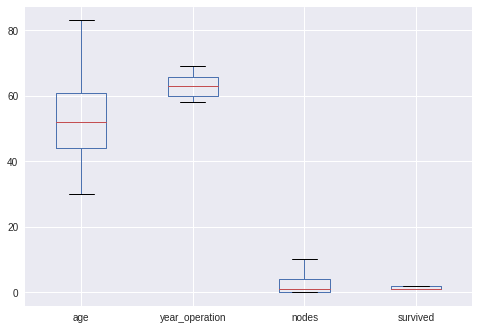

In [32]:
breast.boxplot();

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

According to the correlation matrix 'nodes' has a positive correlation of 0.287 with survival. 'years_operation' has a weak negative correlation with survival of -0.004768; probably statistically insignificant. 'nodes' and 'years_operation' have a correlation of -0.003764. This means there's no linear relationship between them - which is not the same as being independent because there might be a non-linear relationship. Have to look at scatter plot before drawing conclusions.